In [158]:
#Import package
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

##Funcitions 

In [159]:
#------------#
# Function for Visualising Images
def imshow(img):
    plt.axis('off')
    plt.imshow(img, 'gray')
    plt.show()

data/images/training/IDRiD_10.jpg
Original Image


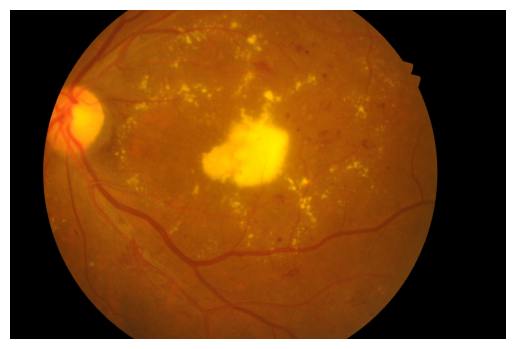

In [178]:
#Input image
image_path = "data/images/test/"
image_path = "data/images/training/"

images = os.listdir(image_path)
images.sort()
print(image_path + "IDRiD_10.jpg" )
img= cv2.imread(image_path + "IDRiD_10.jpg",cv2.IMREAD_COLOR)
print("Original Image")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
imshow(img)

Conversation into green channel image


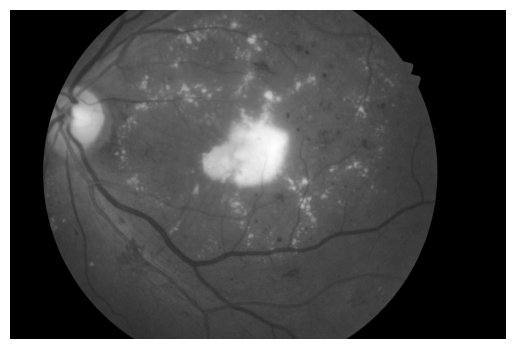

In [161]:
B,img_G,R=cv2.split(img)
imshow(img_G)

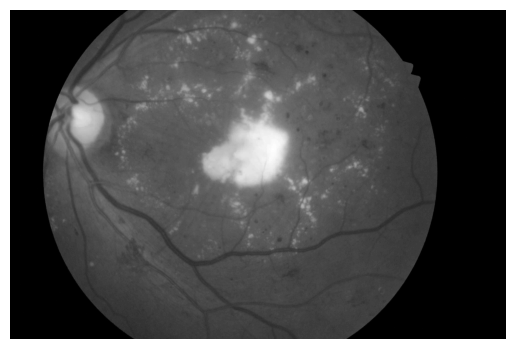

In [162]:
median_fltr= cv2.medianBlur(img_G,3)
imshow(median_fltr)

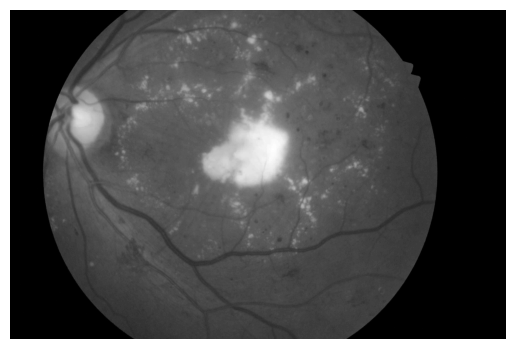

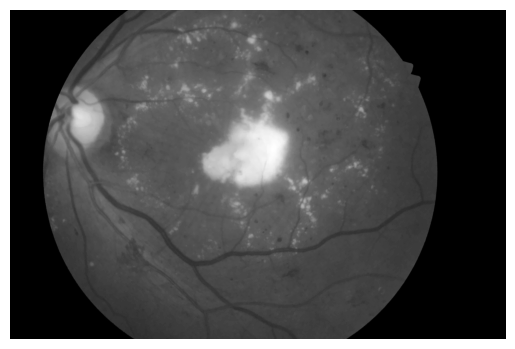

In [163]:
img_nonLocal=cv2.fastNlMeansDenoising(img_G,None,3,7,21)
imshow(median_fltr)
imshow(img_nonLocal)
# img_nonLocal=cv2.fastNlMeansDenoising(median_fltr,None,3,7,21)
# imshow(img_nonLocal)

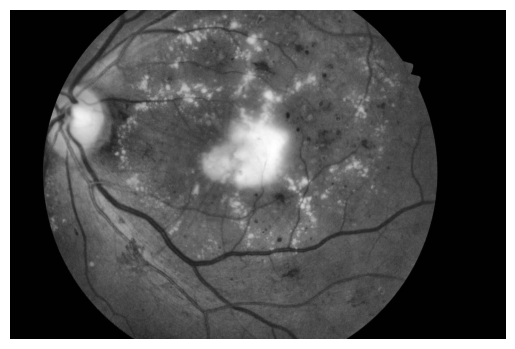

In [164]:
clahe=cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
cl1=clahe.apply(median_fltr)
cl12=clahe.apply(img_nonLocal)

imshow(cl1)

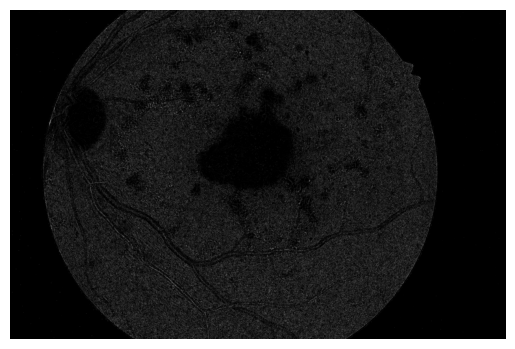

In [165]:
kernel = np.ones((11,11),np.uint8)
tophat_img1=cv2.morphologyEx(cl1,cv2.MORPH_TOPHAT,kernel)
imshow(tophat_img1)
# btm_hat_img=cv2.morphologyEx(cl1,cv2.MORPH_BLACKHAT,kernel)
# imshow(btm_hat_img)

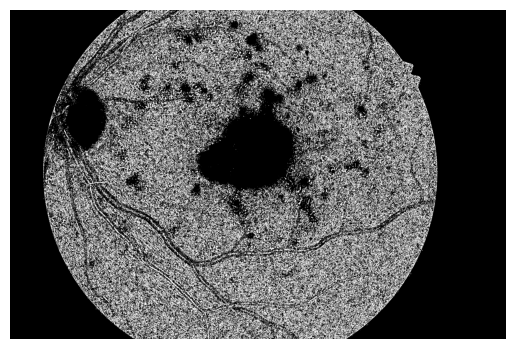

In [166]:
ret, img_labt = cv2.threshold(tophat_img1,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imshow(img_labt)

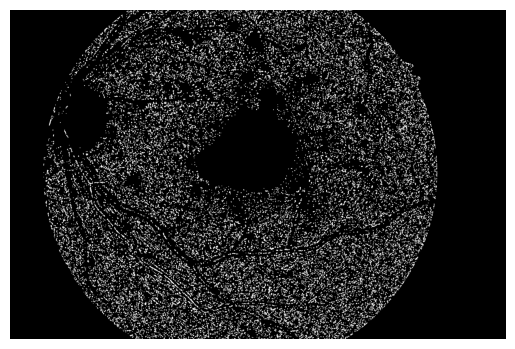

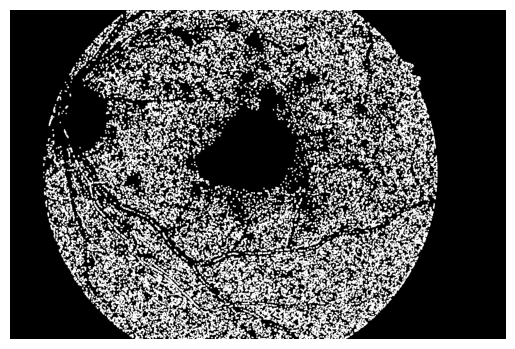

In [172]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(img_labt,cv2.MORPH_OPEN,kernel, iterations = 2)
imshow(opening)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
imshow(sure_bg)

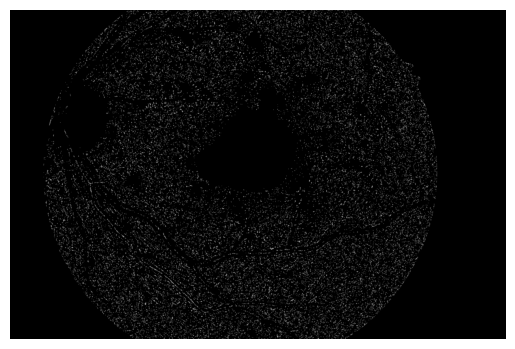

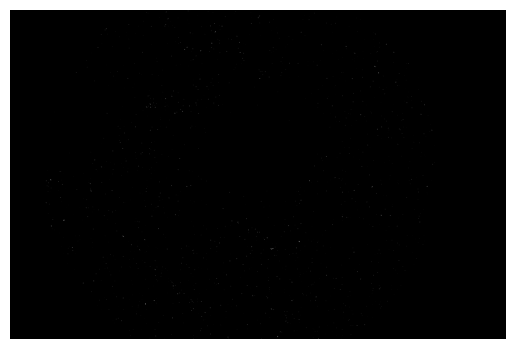

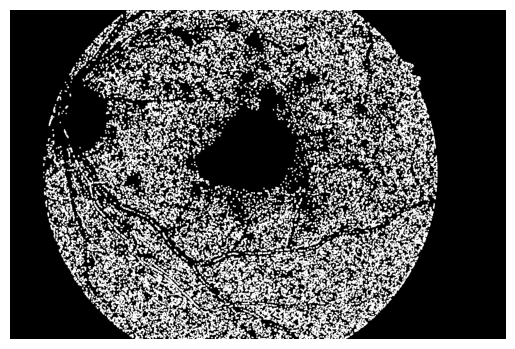

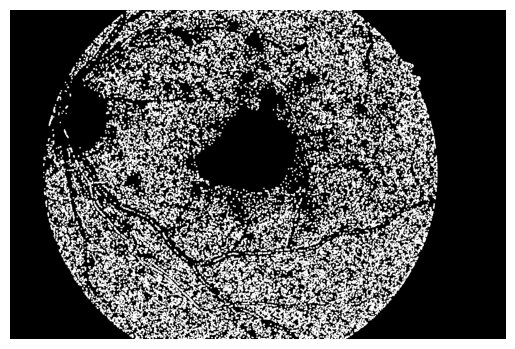

In [173]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
imshow(dist_transform)
imshow(sure_fg)

imshow(sure_bg)

imshow(unknown)

In [177]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
print(cl1.type())

AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [175]:

markers_vis=cv2.normalize(markers,0,255,cv2.NORM_MINMAX)

markers = cv2.watershed(sure_fg,markers)

imshow(markers)

error: OpenCV(4.7.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/segmentation.cpp:161: error: (-215:Assertion failed) src.type() == CV_8UC3 && dst.type() == CV_32SC1 in function 'watershed'
